In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,1612,19211,8982,1464,3481,8132,22008,614,117,2233
6/13/20,1662,20059,9491,1464,3603,8455,22572,615,117,2238
6/14/20,1715,21418,9845,1464,3720,8858,22962,617,123,2248
6/15/20,1744,21422,10272,1464,3826,9178,23271,621,123,2262


In [4]:
deaths.head()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0


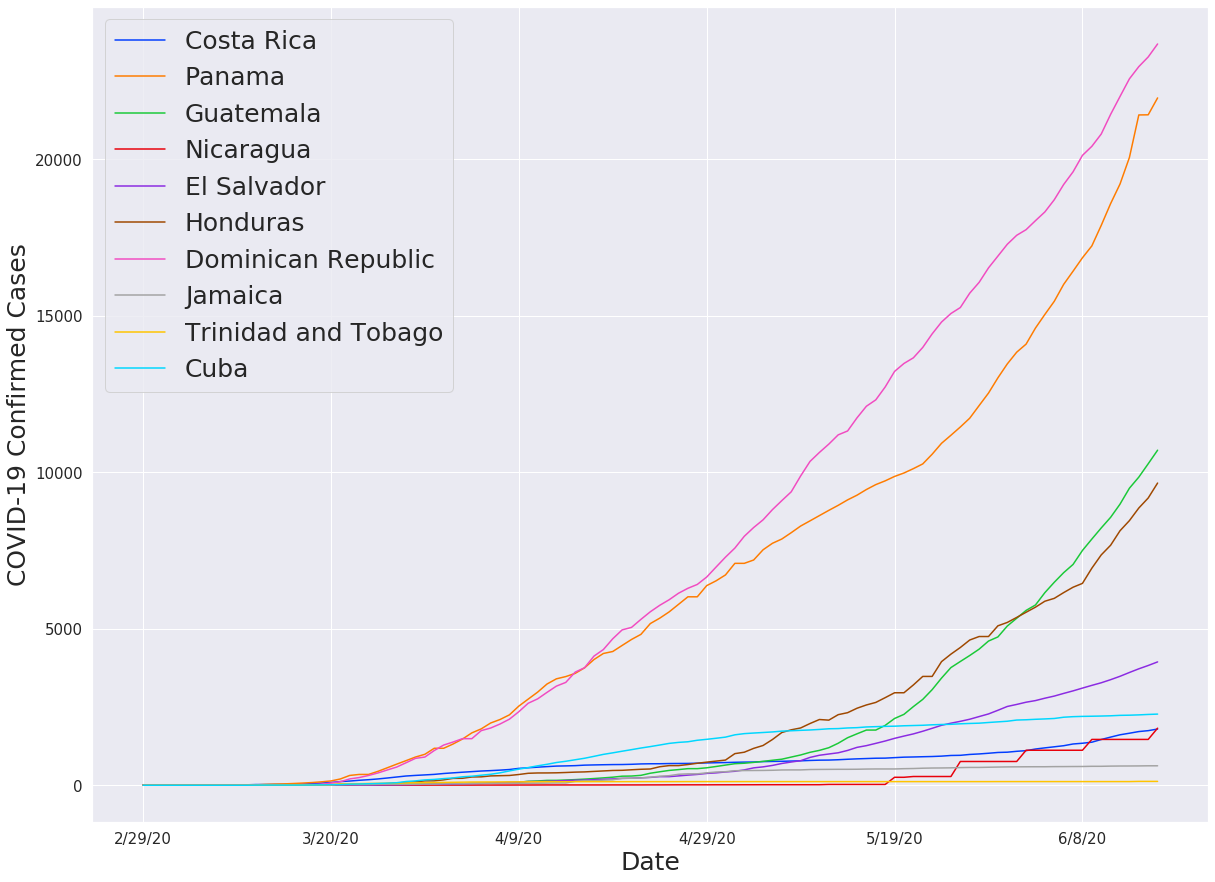

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

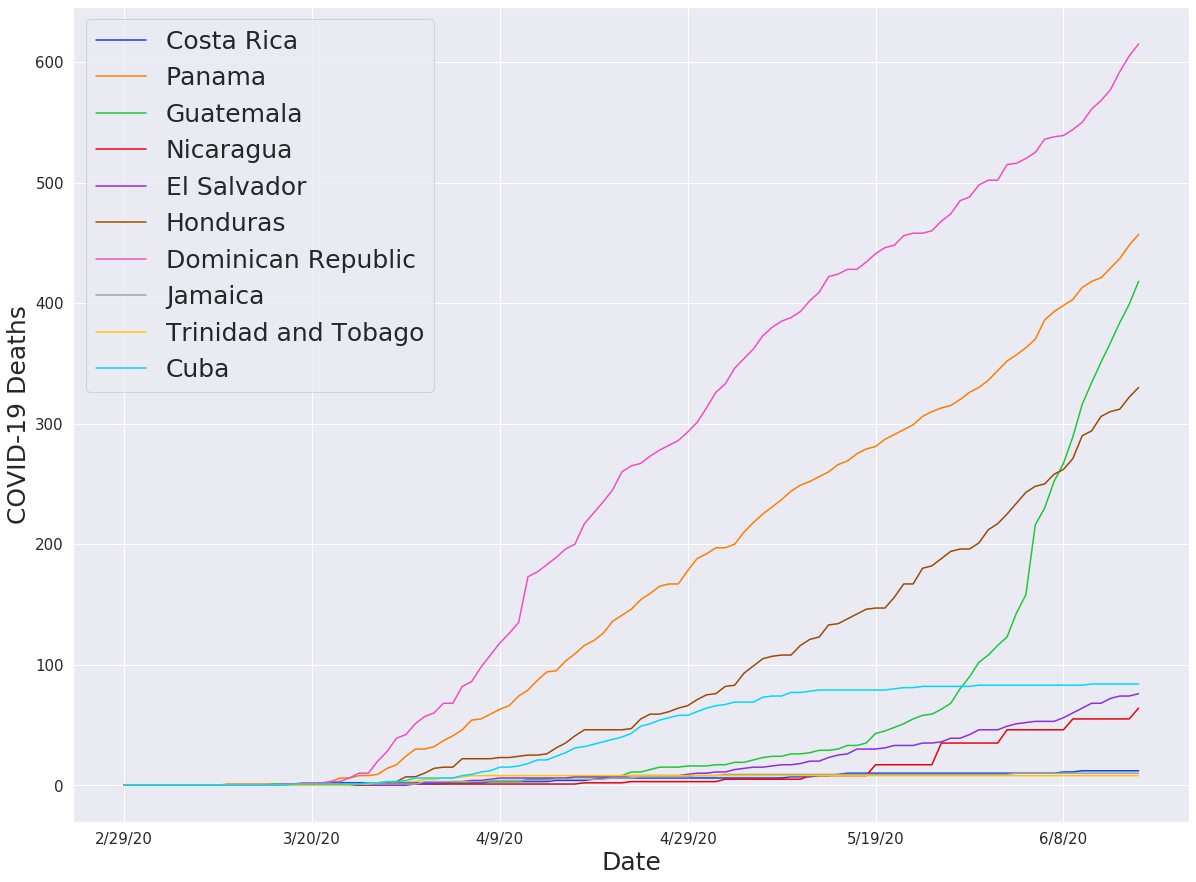

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
3/1/20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,74.0,625.0,421.0,0.0,108.0,463.0,571.0,3.0,0.0,14.0
6/13/20,50.0,848.0,509.0,0.0,122.0,323.0,564.0,1.0,0.0,5.0
6/14/20,53.0,1359.0,354.0,0.0,117.0,403.0,390.0,2.0,6.0,10.0
6/15/20,29.0,4.0,427.0,0.0,106.0,320.0,309.0,4.0,0.0,14.0


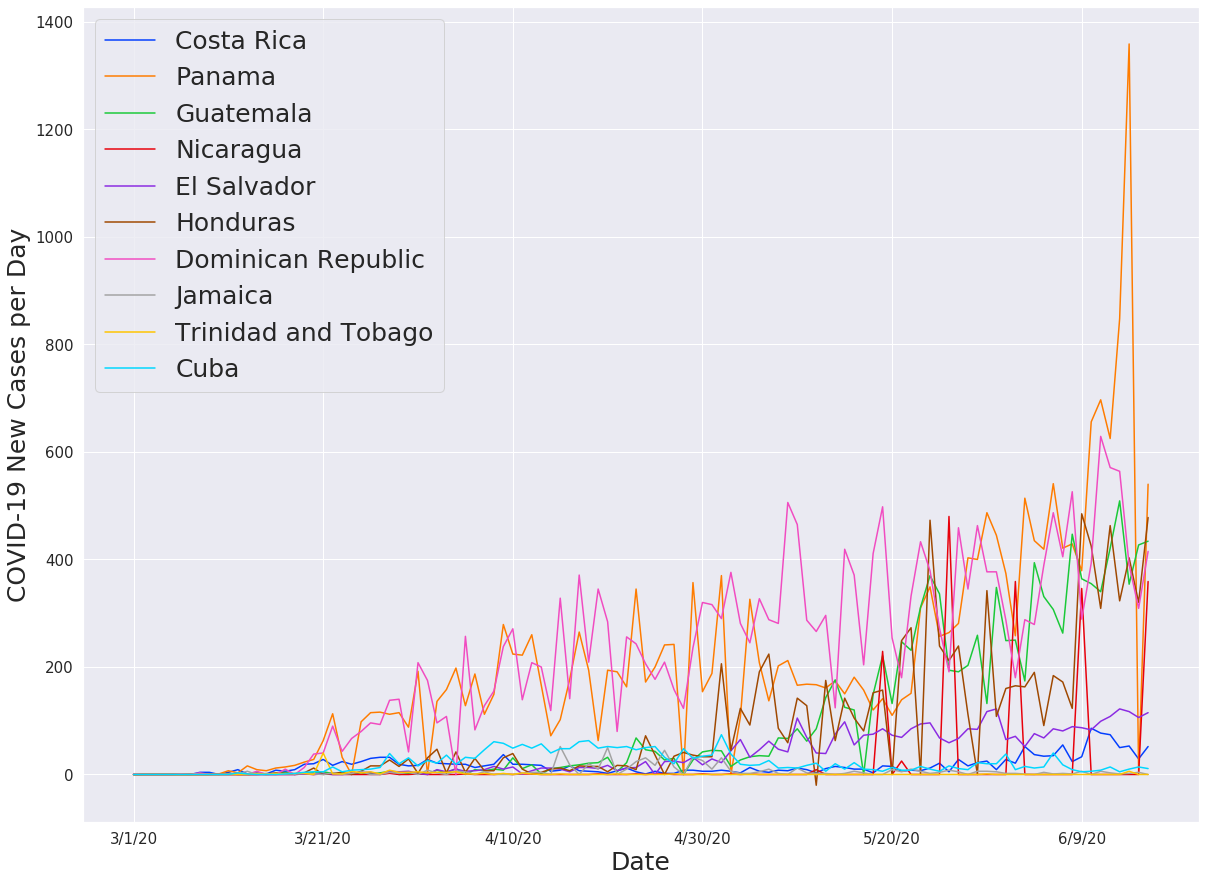

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

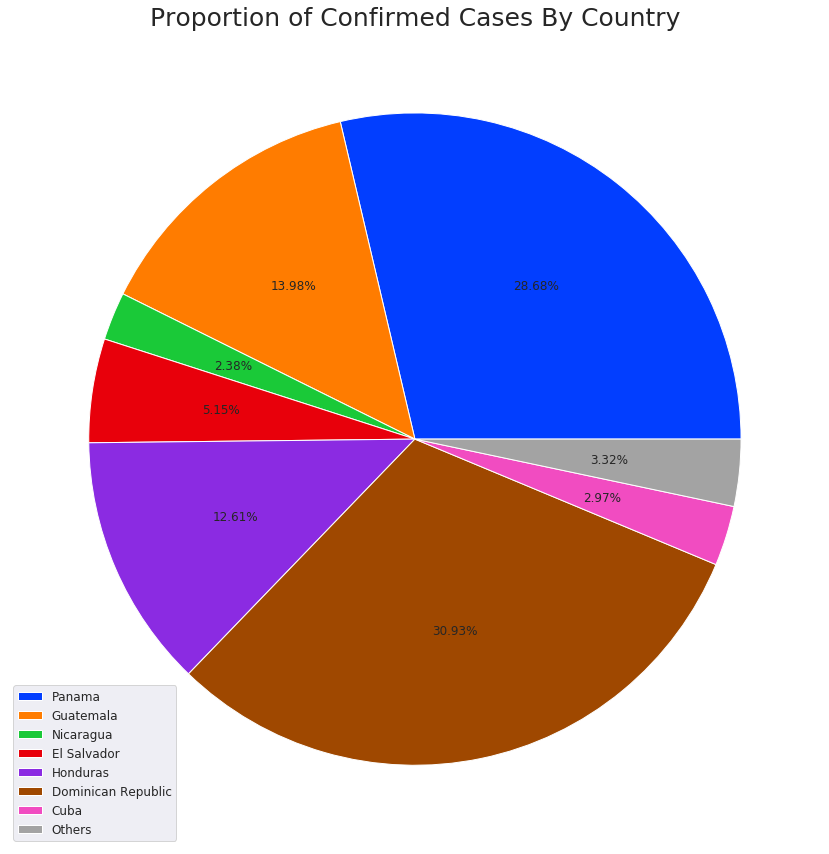

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

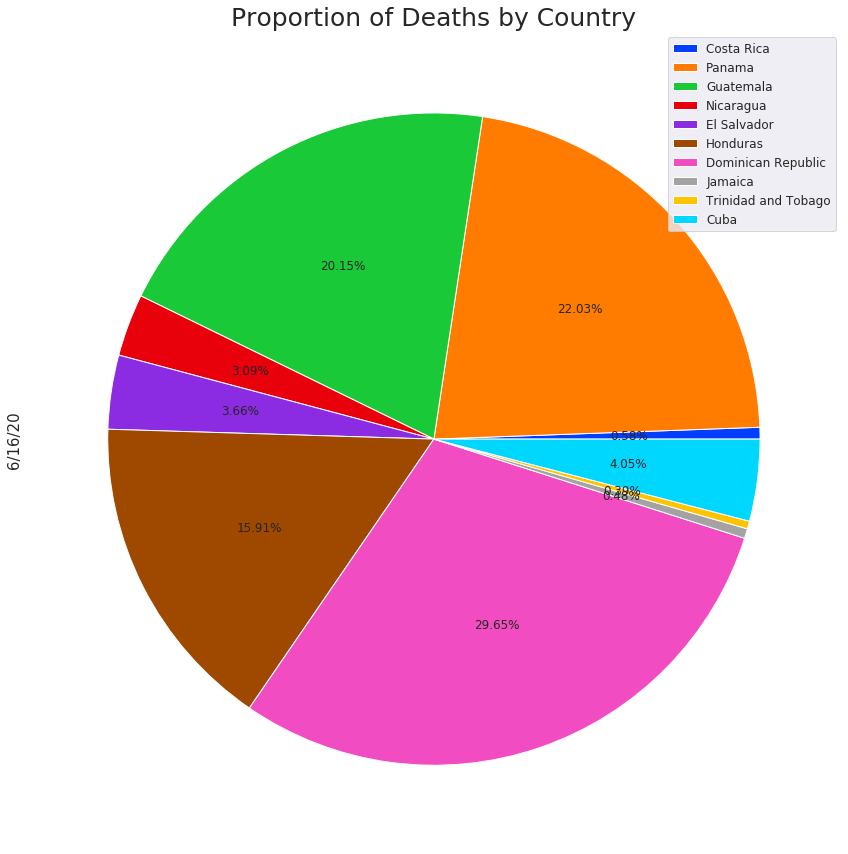

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
6/12/20,1.048114,1.033627,1.049176,1.000000,1.032019,1.060373,1.026636,1.004910,1.000000,1.006309
6/13/20,1.031017,1.044141,1.056669,1.000000,1.035047,1.039720,1.025627,1.001629,1.000000,1.002239
6/14/20,1.031889,1.067750,1.037298,1.000000,1.032473,1.047664,1.017278,1.003252,1.051282,1.004468
6/15/20,1.016910,1.000187,1.043372,1.000000,1.028495,1.036126,1.013457,1.006483,1.000000,1.006228


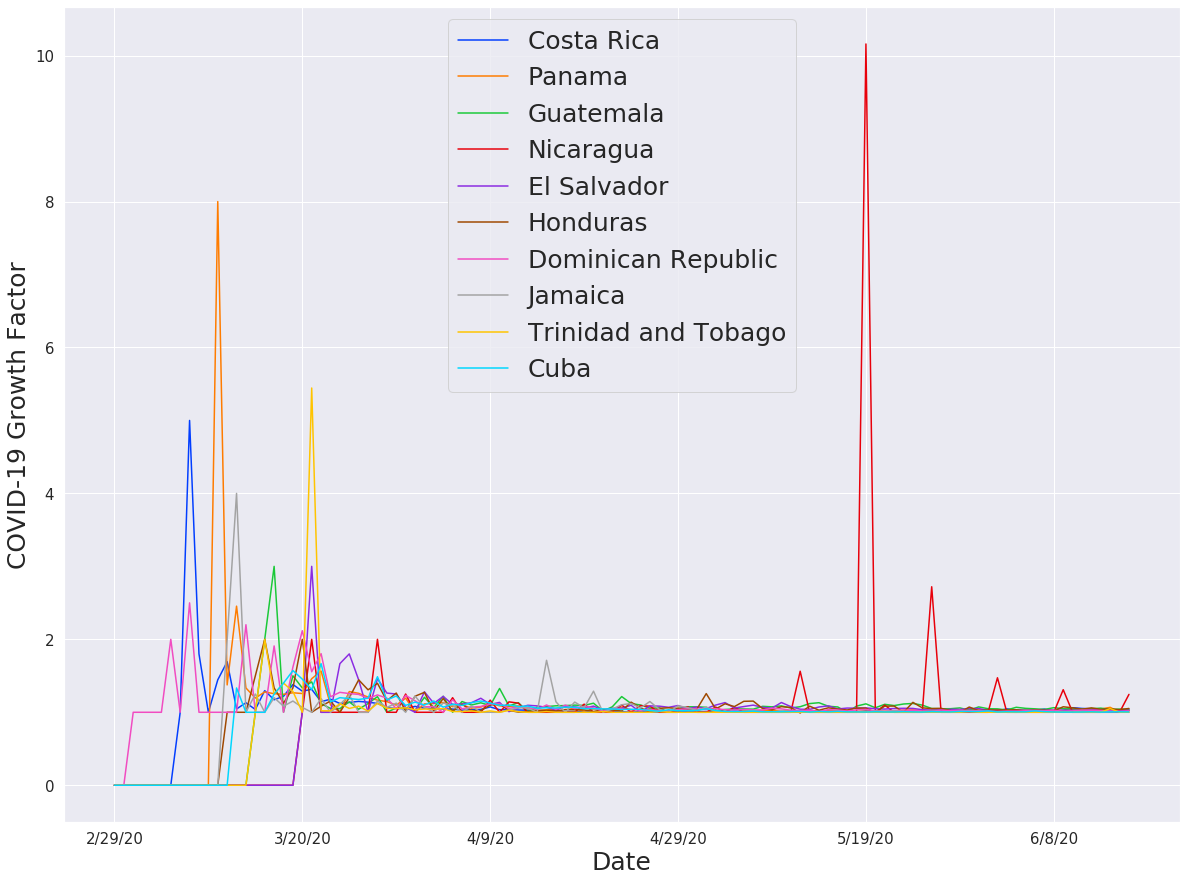

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.033502,1.047282,0.963729,0.963798,0.908197,0.979454,1.098653,0.970514,0.929627,0.949204
std,0.480335,0.766865,0.442675,1.007599,0.483128,0.379367,0.299377,0.461424,0.573958,0.370541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008734,1.018646,1.037298,1.000000,1.019600,1.015152,1.017278,1.000000,1.000000,1.004468
50%,1.019373,1.033627,1.058935,1.000000,1.047745,1.039720,1.030953,1.006483,1.000000,1.011522
75%,1.048114,1.080669,1.098131,1.000000,1.083893,1.084135,1.070022,1.065657,1.008772,1.079032
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


In [17]:
growth_df.mean()

Costa Rica             1.033502
Panama                 1.047282
Guatemala              0.963729
Nicaragua              0.963798
El Salvador            0.908197
Honduras               0.979454
Dominican Republic     1.098653
Jamaica                0.970514
Trinidad and Tobago    0.929627
Cuba                   0.949204
dtype: float64

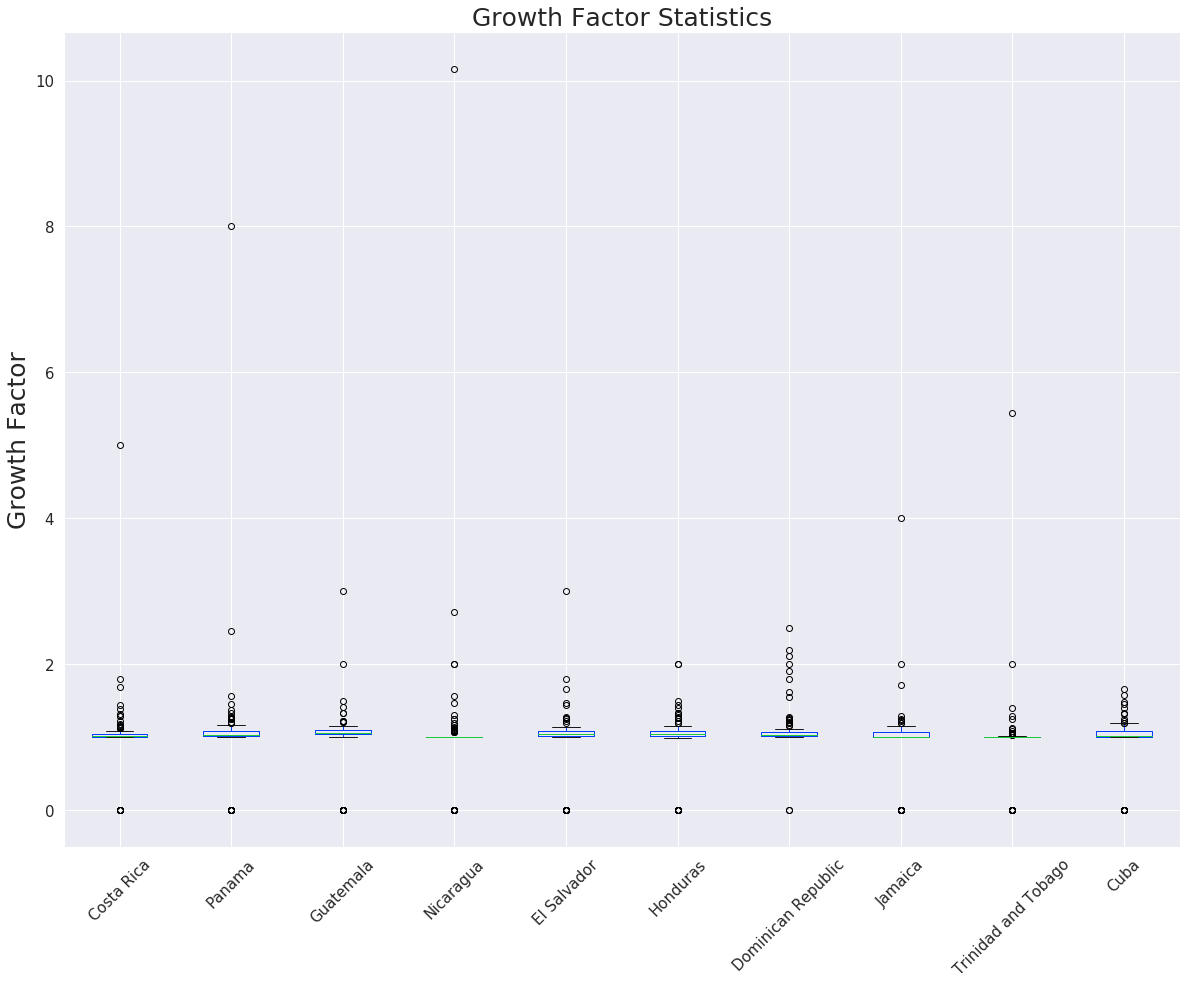

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

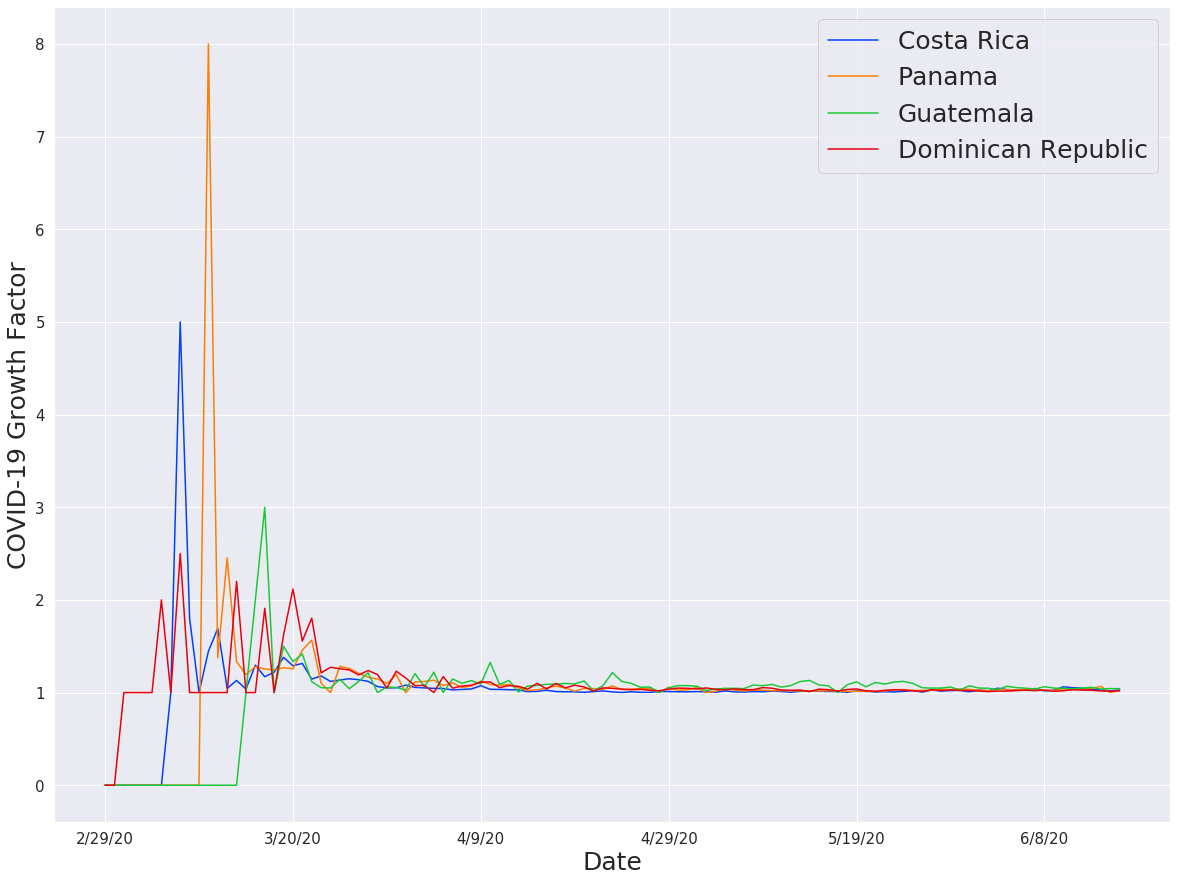

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,102.000000,98.000000,94.000000,89.000000,89.000000,97.000000,107.000000,97.000000,94.000000,96.000000
mean,1.104429,1.164835,1.117515,1.180381,1.112286,1.100624,1.119188,1.090578,1.077972,1.077742
std,0.409394,0.718632,0.232081,0.993700,0.238487,0.164796,0.260994,0.327451,0.470033,0.126887
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.990476,1.000000,1.000000,1.000000,1.000000
25%,1.010487,1.023543,1.046974,1.000000,1.032019,1.025189,1.018105,1.001629,1.000000,1.006289
50%,1.024526,1.036967,1.069458,1.000000,1.056054,1.047664,1.031604,1.009917,1.000000,1.019815
75%,1.050843,1.095404,1.106788,1.000000,1.092754,1.099359,1.072394,1.068182,1.009685,1.094375
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


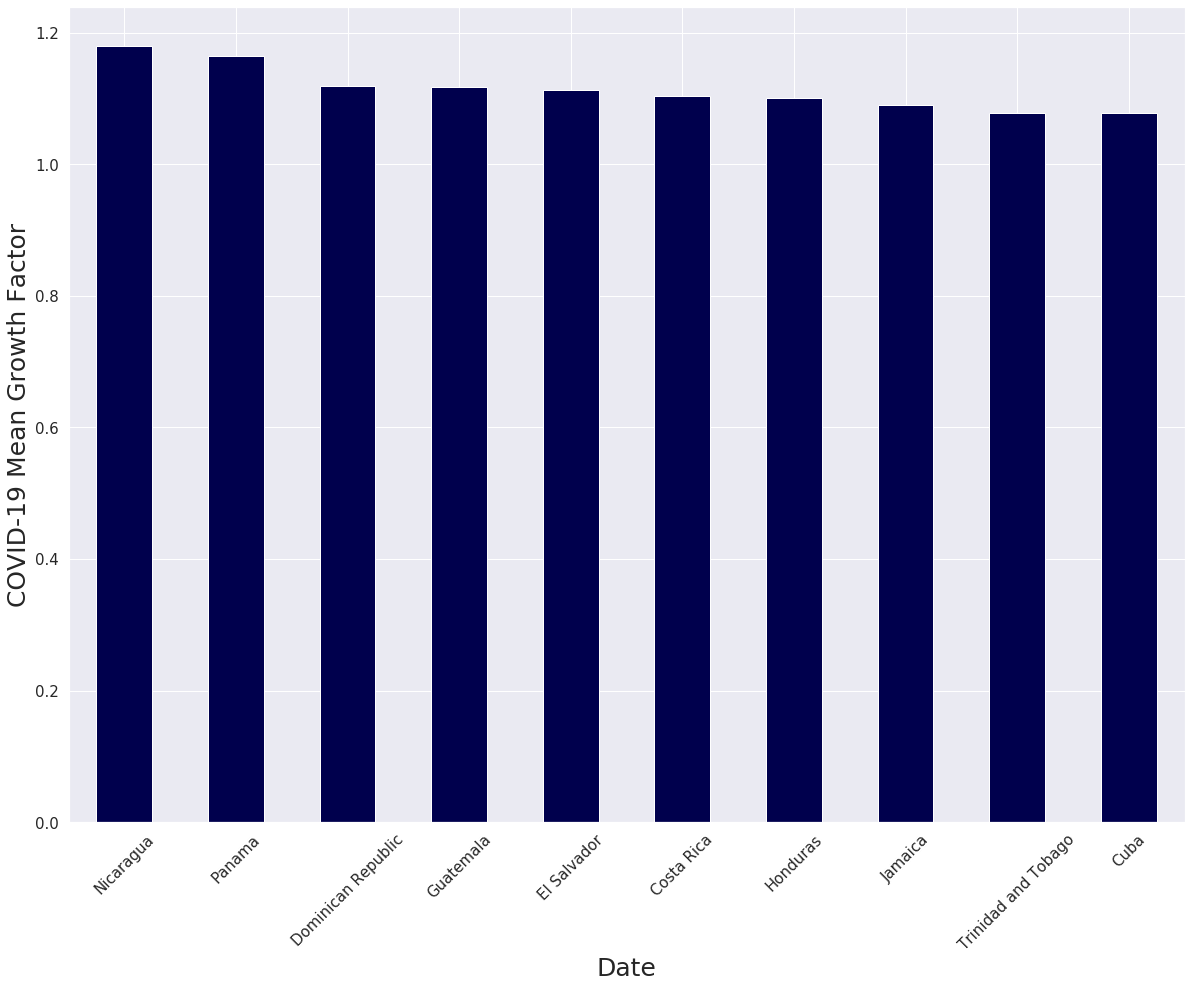

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

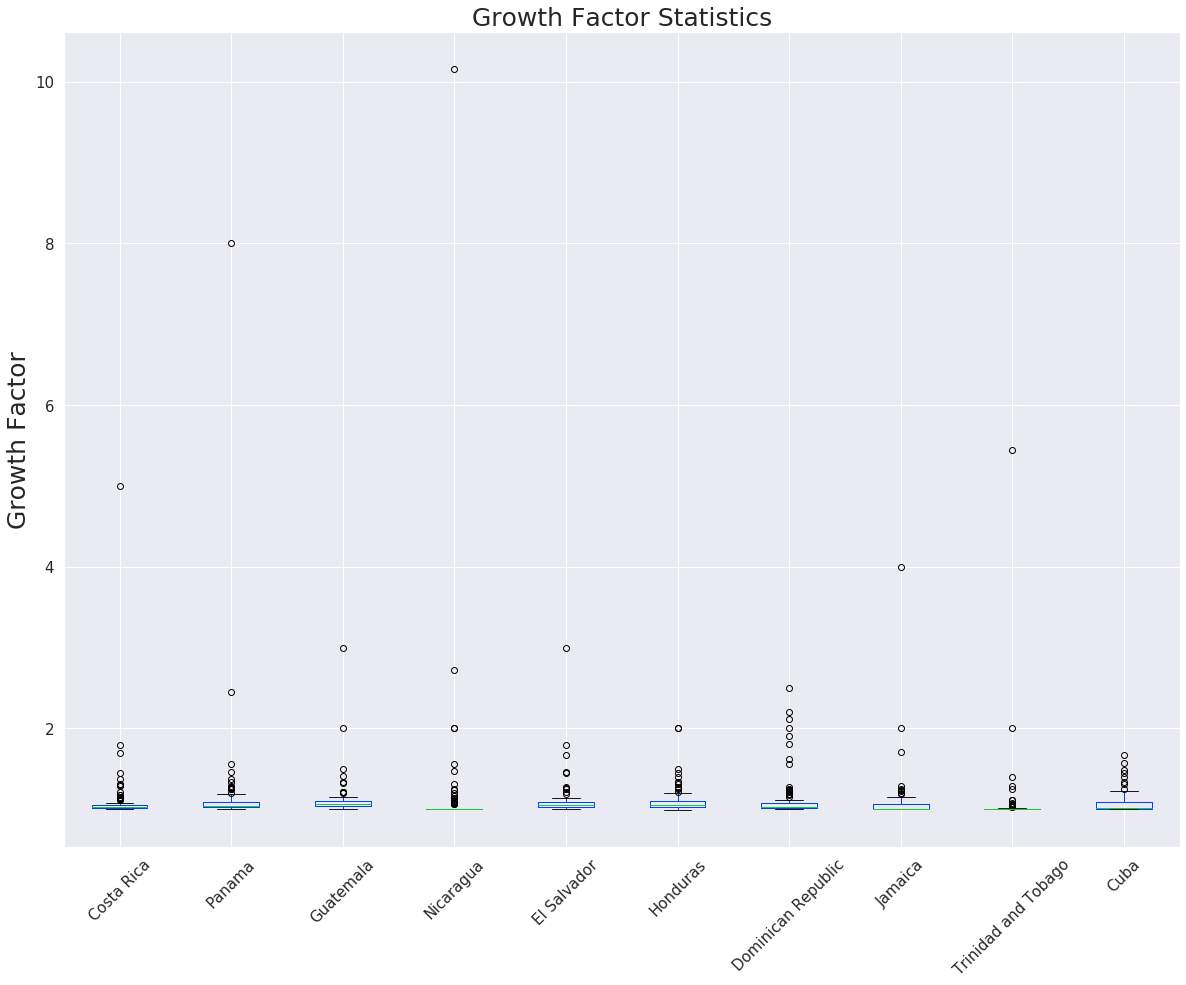

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

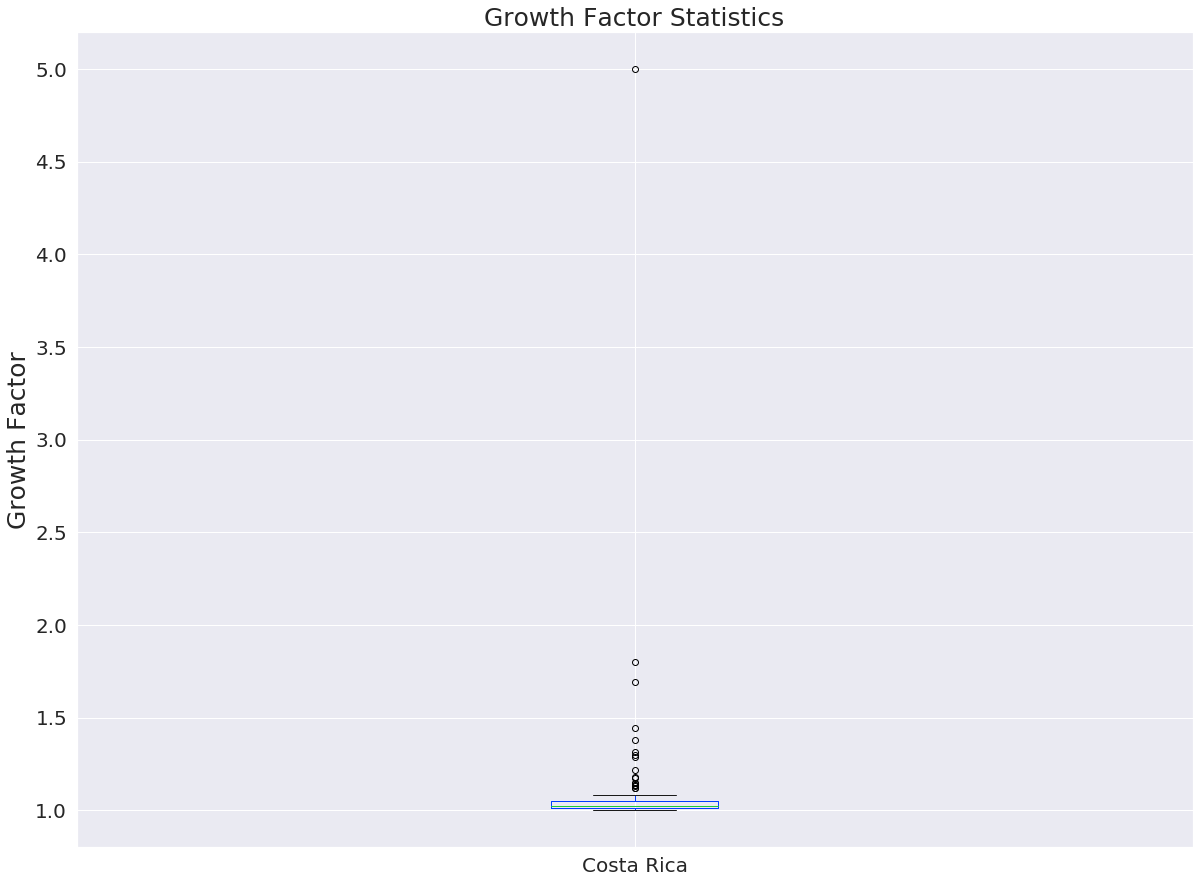

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()